In [1]:
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
from collections import Counter
# Importing dependancy libraries
import os
import pandas as pd
import numpy as np
import re
import math as m
import nltk
nltk.download('stopwords')
from collections import Counter
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_list = stopwords.words('english')
# sorted(stop_list)
from nltk import TreebankWordTokenizer
from sys import version_info
import argparse
import json
import matplotlib
import math
import numpy as np
from numpy import dot
from numpy.linalg import norm


from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install textblob

In [3]:
!unzip /content/Cranfield_Dataset.zip

Archive:  /content/Cranfield_Dataset.zip
   creating: cranfield/
  inflating: cranfield/.DS_Store     
   creating: __MACOSX/
   creating: __MACOSX/cranfield/
  inflating: __MACOSX/cranfield/._.DS_Store  
  inflating: cranfield/cran_queries.json  
  inflating: __MACOSX/cranfield/._cran_queries.json  
  inflating: cranfield/cran_qrels.json  
  inflating: __MACOSX/cranfield/._cran_qrels.json  
  inflating: cranfield/cran_docs.json  
  inflating: __MACOSX/cranfield/._cran_docs.json  
  inflating: cranfield/README.txt    
  inflating: __MACOSX/cranfield/._README.txt  


In [4]:
%cd /content/cranfield

/content/cranfield


In [5]:
import math


# Add your import statements here


class Evaluation():

    def queryPrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The precision value as a number between 0 and 1
        """

        precision = 0

        # Fill in code here
        # precision@k is number of relevant docs encountered till top k
        # docs in the retrieved
        count = 0
        # to keep track of the relevant doc encountered
        i = 0
        while (i < k):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        precision = count / k

        return precision

    def meanPrecision(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of precision of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean precision value as a number between 0 and 1
        """

        meanPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryPrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanPrecision = total_precision / count

        return meanPrecision

    def queryRecall(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The recall value as a number between 0 and 1
        """

        recall = -1

        # Fill in code here
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        if len(true_doc_IDs) > 0:
            recall = count / len(true_doc_IDs)
        else:
            recall = 1

        return recall

    def meanRecall(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of recall of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean recall value as a number between 0 and 1
        """

        meanRecall = -1

        # Fill in code here
        total_recall = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_recall = total_recall + self.queryRecall(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanRecall = total_recall / count

        return meanRecall

    def queryFscore(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The fscore value as a number between 0 and 1
        """

        fscore = -1

        # Fill in code here
        Precision_at_k = -1
        Recall_at_k = -1
        count = 0
        i = 0
        while i < k and i < len(query_doc_IDs_ordered):
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                count = count + 1
            i = i + 1
        Precision_at_k = count / k
        Recall_at_k = count / len(true_doc_IDs)
        if Precision_at_k + Recall_at_k > 0:
            fscore = 2 * Precision_at_k * Recall_at_k / (Precision_at_k + Recall_at_k)
        else:
            fscore = 0

        return fscore

    def meanFscore(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of fscore of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean fscore value as a number between 0 and 1
        """

        meanFscore = -1

        # Fill in code here
        count = 0
        total_Fscore = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_Fscore = total_Fscore + self.queryFscore(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanFscore = total_Fscore / count

        return meanFscore

    def queryNDCG(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of nDCG of the Information Retrieval System
        at given value of k for a single query

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of IDs of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The nDCG value as a number between 0 and 1
        """

        nDCG = -1

        # Fill in code here
        i = 0
        j = 0
        DCG = 0
        best_order = []
        while i < k:
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                DCG = DCG + true_doc_IDs[query_doc_IDs_ordered[i]] / math.log((i + 2), 2)
                best_order.append(true_doc_IDs[query_doc_IDs_ordered[i]])
            i = i + 1
        best_order.sort(reverse=True)
        iDCG = 0
        while j < len(best_order):
            iDCG = iDCG + best_order[j] / math.log((j + 2), 2)
            j = j + 1
        if iDCG > 0:
            nDCG = DCG / iDCG
        else:
            nDCG = 0

        return nDCG

    def meanNDCG(self, doc_IDs_ordered, query_ids, qrels, k):
        """
        Computation of nDCG of the Information Retrieval System
        at a given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries for which the documents are ordered
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The mean nDCG value as a number between 0 and 1
        """

        meanNDCG = -1

        # Fill in code here
        totalNDCG = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = {}
            flag = 0
            for dic in qrels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs[int(dic["id"])] = 5 - int(dic["position"])
                elif flag == 1:
                    break
            totalNDCG = totalNDCG + self.queryNDCG(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanNDCG = totalNDCG / count

        return meanNDCG

    def queryAveragePrecision(self, query_doc_IDs_ordered, query_id, true_doc_IDs, k):
        """
        Computation of average precision of the Information Retrieval System
        at a given value of k for a single query (the average of precision@i
        values for i such that the ith document is truly relevant)

        Parameters
        ----------
        arg1 : list
            A list of integers denoting the IDs of documents in
            their predicted order of relevance to a query
        arg2 : int
            The ID of the query in question
        arg3 : list
            The list of documents relevant to the query (ground truth)
        arg4 : int
            The k value

        Returns
        -------
        float
            The average precision value as a number between 0 and 1
        """

        avgPrecision = -1

        # Fill in code here
        count = 0
        total_precision = 0
        i = 0
        while i < k :
            if query_doc_IDs_ordered[i] in true_doc_IDs:
                total_precision = total_precision + ((count + 1) / (i + 1))
                count = count + 1
            i = i + 1
        if count > 0:
            avgPrecision = total_precision / count
        else:
            avgPrecision = 0

        return avgPrecision

    def meanAveragePrecision(self, doc_IDs_ordered, query_ids, q_rels, k):
        """
        Computation of MAP of the Information Retrieval System
        at given value of k, averaged over all the queries

        Parameters
        ----------
        arg1 : list
            A list of lists of integers where the ith sub-list is a list of IDs
            of documents in their predicted order of relevance to the ith query
        arg2 : list
            A list of IDs of the queries
        arg3 : list
            A list of dictionaries containing document-relevance
            judgements - Refer cran_qrels.json for the structure of each
            dictionary
        arg4 : int
            The k value

        Returns
        -------
        float
            The MAP value as a number between 0 and 1
        """

        meanAveragePrecision = -1

        # Fill in code here
        total_precision = 0
        count = 0
        for i in query_ids:
            true_doc_IDs = []
            flag = 0
            for dic in q_rels:
                if int(dic["query_num"]) == i:
                    flag = 1
                    true_doc_IDs.append(int(dic["id"]))
                elif flag == 1:
                    break
            total_precision = total_precision + self.queryAveragePrecision(doc_IDs_ordered[count], i, true_doc_IDs, k)
            count = count + 1
        meanAveragePrecision = total_precision / count

        return meanAveragePrecision


In [6]:
def punktSentenceSegmenter( text): 
  segmentedText = None
  # Fill in code here
  # Loading PunktSentenceTokenizer using English pickle file
  tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
  segmentedText = tokenizer.tokenize(text)
  return segmentedText

def pennTreeBankTokenizer(text):
  #Fill in code here
	tokenizedText = list()

	# Fill in code here
	for ls in text:
		tokenList=TreebankWordTokenizer().tokenize(ls)
		tokenizedText.append(tokenList)

	return tokenizedText

def Lematization(text):
  reducedText = list()
  lemmatizer = WordNetLemmatizer()
  for ls in text:
    sentence_list=list()
    for word in ls:
      sentence_list.append(lemmatizer.lemmatize(word))
    reducedText.append(sentence_list)
		
  return reducedText

def stopWordRemoval(text):
  # Fill in code here
  stopwordRemovedText = []
  stop_words = set(stopwords.words('english'))
  for i in range(len(text)):
    filtered_sentence = []
    for w in text[i]:
      if w not in stop_words:
        filtered_sentence.append(w)
    stopwordRemovedText.append(filtered_sentence)
  return stopwordRemovedText

def spellChecker(text):
  spellCheckedText = []
  for i in range(len(text)):
    checked_sentence = []
    for w in text[i]:
      checked_sentence.append(str(TextBlob(w).correct()))
    spellCheckedText.append(checked_sentence)
  return spellCheckedText

In [7]:
def preprocess(docs):
  segmentedDocs = []
  for doc in docs:
    segmentedDoc = punktSentenceSegmenter(doc)
    segmentedDocs.append(segmentedDoc)
    #print(segmentedDoc)
  # Tokenize docs
  tokenizedDocs = []
  for doc in segmentedDocs:
    tokenizedDoc = pennTreeBankTokenizer(doc)
    tokenizedDocs.append(tokenizedDoc)
    #print(tokenizedDoc)
  # Stem/Lemmatize docs
  reducedDocs = []
  for doc in tokenizedDocs:
    reducedDoc = Lematization(doc)
    reducedDocs.append(reducedDoc)
    #print(reducedDoc)
 #SpellChecker
  # count = 0
  # spellCheckedDocs = []
  # for doc in reducedDocs:
  #   count=count+1
  #   print(count)
  #   spellCheckedDoc= spellChecker(doc)
  #   spellCheckedDocs.append(spellCheckedDoc)

 # Remove stopwords from docs
  stopwordRemovedDocs = []
  for doc in reducedDocs:
    stopwordRemovedDoc = stopWordRemoval(doc)
    stopwordRemovedDocs.append(stopwordRemovedDoc)
    #print(stopwordRemovedDoc)
  preprocessedDocs = stopwordRemovedDocs
  return preprocessedDocs
        

In [8]:
def preprocess(docs):
  segmentedDocs = []
  for doc in docs:
    segmentedDoc = punktSentenceSegmenter(doc)
    segmentedDocs.append(segmentedDoc)
    #print(segmentedDoc)
  # Tokenize docs
  tokenizedDocs = []
  for doc in segmentedDocs:
    tokenizedDoc = pennTreeBankTokenizer(doc)
    tokenizedDocs.append(tokenizedDoc)
    #print(tokenizedDoc)
  # Stem/Lemmatize docs
  reducedDocs = []
  for doc in tokenizedDocs:
    reducedDoc = Lematization(doc)
    reducedDocs.append(reducedDoc)
    #print(reducedDoc)
 #SpellChecker
  # count = 0
  # spellCheckedDocs = []
  # for doc in reducedDocs:
  #   count=count+1
  #   print(count)
  #   spellCheckedDoc= spellChecker(doc)
  #   spellCheckedDocs.append(spellCheckedDoc)

 # Remove stopwords from docs
  stopwordRemovedDocs = []
  for doc in reducedDocs:
    stopwordRemovedDoc = stopWordRemoval(doc)
    stopwordRemovedDocs.append(stopwordRemovedDoc)
    #print(stopwordRemovedDoc)
  preprocessedDocs = stopwordRemovedDocs
  return preprocessedDocs
        

## Calculating df values for each term in the vocabulary

In [9]:
def calculatedf(all_docs):
    # create a dictionary of key-value pairs where tokens are keys and their occurence in the corpus the value
    DF = {}
    no_of_docs=len(all_docs)
    for i in range(no_of_docs):
        tokens = all_docs[i]
        for w in tokens:
            try:
                # add token as key and doc number as value is chained
                DF[w].add(i)
            except:
                # to handle when a new token is encountered
                DF[w] = {i}

    for i in DF:
        # convert to number of occurences of the token from list of documents where token occurs
        DF[i] = len(DF[i])
    print(DF)
    return DF


In [10]:
#DF=calculatedf(all_docs)

In [11]:
def make_dictionary(DF):
    # count number of unique words in the corpus
    vocab_size = len(DF)
    print(vocab_size)
    # create vocabulary list of all unique words
    vocab = [term for term in DF]
    print(vocab)
    return vocab,vocab_size


In [12]:
#vocab,vocab_size=make_dictionary(DF)

## Calculating tf-idf values for each term in the vocabulary

In [13]:
def create_tf_idf(all_docs,DF,vocab):
    doc = 0

    # creating dictionary to store tf-idf values for each term in the vocabulary
    tf_idf = {}
    no_of_docs=len(all_docs)
    for i in range(no_of_docs):
        
        tokens = all_docs[i]
        
        # counter object to efficiently count number of occurence of a term in a particular document
        counter = Counter(tokens)
        words_count = len(tokens)
        
        for token in np.unique(tokens):
            
            # counting occurence of term in object using counter object
            tf = counter[token]/words_count
            # retrieving df values from DF dictionary
            df = DF[token] if token in vocab else 0
            
            # adding 1 to numerator & denominator to avoid divide by 0 error
            idf = np.log((no_of_docs+1)/(df+1))
            
            tf_idf[doc, token] = tf*idf

        doc += 1
    return tf_idf

In [14]:
# print(tf_idf)
#tf_idf= create_tf_idf(all_docs,DF)
#tf_idf[1, 'paper']

#Craeting Document Matrix

In [15]:

def createDocMatrix(no_of_docs,vocab_size,tf_idf,vocab):
    # initializing empty vector of vocabulary size
    D = np.zeros((no_of_docs, vocab_size))
    word_index={}
    # creating vector of tf-idf values
    for i in tf_idf:
        ind = vocab.index(i[1])
        D[i[0]][ind] = tf_idf[i]
        word_index[i[1]] =i[0],ind
    print(len(D),D.shape)
    print(D)
    return D,word_index

In [16]:
#D=createDocMatrix(no_of_docs,vocab_size,tf_idf,vocab)

In [17]:
def gen_query_vector(tokens,vocab,DF,no_of_docs):
    """To create a vector (with repsect to the vocabulary) of the tokens passed as input
    
    Arguments:
        tokens {list} -- list of tokens to be converted
    
    Returns:
        numpy.ndarray -- vector of tokens
    """
    Q = np.zeros((len(vocab)))
    
    counter = Counter(tokens)
    words_count = len(tokens)

    query_weights = {}
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = DF[token] if token in vocab else 0
        idf = m.log10((no_of_docs+1)/(df+1))

        try:
            ind = vocab.index(token)
            Q[ind] = tf*idf
        except:
            pass
    #print(Q.shape)
    return Q

In [18]:
# import chain
#from itertools import chain
#queries=[]
#for i in range(len(processedQueries)):
#    queries.append(list(chain.from_iterable(processedQueries[i])))
#queries[0]

In [19]:
#vector=gen_query_vector(queries[0],vocab,DF)

In [20]:
#for i in range(len(vector)):
#    if vector[i]!=0.0:
#        print(vector[i])

In [21]:
def cosine_sim(x, y):
    """To calculate cosine similarity between 2 vectors.
    
    Arguments:
        x {numpy.ndarray} -- vector 1
        y {numpy.ndarray} -- vector 2
    
    Returns:
        numpy.float64 -- cosine similarity between vector 1 & vector 2
    """
    cos_sim = max(0,np.dot(x, y)/max(0,(np.linalg.norm(x)*np.linalg.norm(y))))
    
    return cos_sim

In [22]:
def cosine_similarity(k, query,vocab,DF,no_of_docs,D):
    """To determine a ranked list of top k documents in descending order of their
    cosine similarity with the query
    
    Arguments:
        k {integer} -- top k documents to retrieve from 
        query {string} -- query whose cosine similarity is to be computed with the corpus
    
    Returns:
        numpy.ndarray -- list of top k cosine similarities between query and corpus of documents
    """

    #tokens = query.split()
    tokens = query
      
    d_cosines = []
    
    # vectorize the input query tokens
    query_vector = gen_query_vector(tokens,vocab,DF,no_of_docs)
    
    for d in D:
        d_cosines.append(cosine_sim(query_vector, d))
        
    if k == 0:
        # k=0 to retrieve all documents in descending order
        out = np.array(d_cosines).argsort()[::-1]
        
    else:
        # to retrieve the top k documents in descending order    
        out = np.array(d_cosines).argsort()[-k:][::-1]
    
    return out

In [23]:
def get_top_k_docs(k,queri,vocab,DF,no_of_docs,D):
    """To generate a ranked list of k top documents in descending order of their cosine similarity 
    calculated against the queries. Output is a list of (query id, document id) pairs.
    
    If k=0 is given as input then list of all documnets in descending order is returned.
    
    Arguments:
        k {integer} -- number of top documents to be retrieved
    
    Returns:
        list -- list of documents in descending order of their cosine similarity
    """
    cos_sims = []
    for i in range(len(queri)):
        res = cosine_similarity(k, queri[i],vocab,DF,no_of_docs,D)
        res=[x + 1 for x in res]
        #cs = [i,res ]
        #cos_sims.append(cs)
        cos_sims.append(res)
        
    return cos_sims


In [24]:
def normalize_cols(x: np.ndarray):
    """
    function that normalizes each row of the matrix x to have unit length.

    Args:
     ``x``: A numpy matrix of shape (n, m)

    Returns:
     ``x``: The normalized (by row) numpy matrix.
    """
    return x/(np.linalg.norm(x, ord=2, axis=0, keepdims=True)+0.00000000000000000001)

In [25]:
def return_cosine_similarity(D_rep,Q_rep):
    Doc_tf_id=D_rep.T
    #print(Doc_tf_id.shape)
    Q_rep = Q_rep.T
    Q_rep=normalize_cols(Q_rep)
    Doc_tf_id=normalize_cols(Doc_tf_id)
    #print(Doc_tf_id.shape)
    #print(Q_rep.shape)
    cosine_smiliratity_values = (np.dot( np.transpose(Doc_tf_id),Q_rep))
    #print(cosine_smiliratity_values.shape)
    return  cosine_smiliratity_values


In [26]:
def return_orderded_docs(cosine_smiliratity_values):
    b= cosine_smiliratity_values
    #print(b,"\n")
    out = np.array(b.argsort(axis=0))[::-1]
    #print(out,"\n")
    #b.sort(axis=0)
    #print(b,"\n")
    b.shape
    doc_IDs_ordered = (out.T).tolist()
    print(len(doc_IDs_ordered))
    for i in range(len(doc_IDs_ordered)):
        res=doc_IDs_ordered[i]
        doc_IDs_ordered[i]=[x + 1 for x in res]
    print(doc_IDs_ordered[0])
    return doc_IDs_ordered

In [27]:
#np.array(DF).shape

In [28]:
# Read relevance judements
def EvaluateSystem(doc_IDs_ordered):
  qrels = json.load(open("cran_qrels.json", 'r'))[:]

  evaluator=Evaluation()
          # Calculate precision, recall, f-score, MAP and nDCG for k = 1 to 10
  precisions, recalls, fscores, MAPs, nDCGs = [], [], [], [], []
  for k in range(1, 11):
    precision = evaluator.meanPrecision(
                  doc_IDs_ordered, query_ids, qrels, k)
    precisions.append(precision)
    recall = evaluator.meanRecall(
                  doc_IDs_ordered, query_ids, qrels, k)
    recalls.append(recall)
    fscore = evaluator.meanFscore(
                  doc_IDs_ordered, query_ids, qrels, k)
    fscores.append(fscore)
    print("Precision, Recall and F-score @ " +
                    str(k) + " : " + str(precision) + ", " + str(recall) +
                    ", " + str(fscore))
    MAP = evaluator.meanAveragePrecision(
                  doc_IDs_ordered, query_ids, qrels, k)
    MAPs.append(MAP)
    nDCG = evaluator.meanNDCG(
                  doc_IDs_ordered, query_ids, qrels, k)
    nDCGs.append(nDCG)
    print("MAP, nDCG @ " +
                    str(k) + " : " + str(MAP) + ", " + str(nDCG))

          # Plot the metrics and save plot
  plt.plot(range(1, 11), precisions, label="Precision")
  plt.plot(range(1, 11), recalls, label="Recall")
  plt.plot(range(1, 11), fscores, label="F-Score")
  plt.plot(range(1, 11), MAPs, label="MAP")
  plt.plot(range(1, 11), nDCGs, label="nDCG")
  plt.legend()
  plt.title("Evaluation Metrics - Cranfield Dataset")
  plt.xlabel("k")
  plt.savefig("eval_plot_old.png")
  plt.show()
  return precisions,recalls,fscores,MAPs,nDCGs


In [29]:
def compare_results(Model1,Model2):
    #figure, axes = plt.subplots(nrows=3, ncols=2,figsize = (40,15))
    fig, axs = plt.subplots(3, 2,figsize=(15,20))
    axs[0, 0].plot(range(1, 11), Model1[0], label="Precision1")
    axs[0, 0].plot(range(1, 11), Model2[0], label="Precision2")
    axs[0, 0].legend()
    axs[0, 0].set_title("Precision Comaparison - Cranfield Dataset")
    axs[0,0].set_xlabel("k")


    #fig, axs = plt.subplots(2, 2,figsize=(20,9))
    axs[0, 1].plot(range(1, 11), Model1[1], label="Recall1")
    axs[0, 1].plot(range(1, 11), Model2[1], label="Recall2")
    axs[0, 1].legend()
    axs[0, 1].set_title("Recall Comaparison  - Cranfield Dataset")
    axs[0,1].set_xlabel("k")


    axs[1, 0].plot(range(1, 11), Model1[2], label="F-Score1")
    axs[1, 0].plot(range(1, 11), Model2[2], label="F-Score2")
    axs[1, 0].legend()
    axs[1, 0].set_title("F-Score Comaparison - Cranfield Dataset")
    axs[1, 0].set_xlabel("k")


    axs[1, 1].plot(range(1, 11), Model1[3], label="MAP1")
    axs[1, 1].plot(range(1, 11), Model2[3], label="MAP2")
    axs[1, 1].legend()
    axs[1, 1].set_title("MAP Comaparison  - Cranfield Dataset")
    axs[1,1].set_xlabel("k")



    axs[2, 0].plot(range(1, 11), Model1[4], label="nDCG1")
    axs[2, 0].plot(range(1, 11), Model2[4], label="nDCG2")
    axs[2, 0].legend()
    axs[2, 0].set_title("nDCG Comaparison  - Cranfield Dataset")
    axs[2, 0].set_xlabel("k")
   
    axs[2, 1].plot(range(1, 11), Model1[0], label="Precision1")
    axs[2, 1].plot(range(1, 11), Model2[0], label="Precision2")
    axs[2, 1].plot(range(1, 11), Model1[1], label="Recall1")
    axs[2, 1].plot(range(1, 11), Model1[1], label="Recall2")
    axs[2, 1].plot(range(1, 11), Model1[2], label="F-Score1")
    axs[2, 1].plot(range(1, 11), Model2[2], label="F-Score2")
    axs[2, 1].plot(range(1, 11), Model1[3], label="MAP1")
    axs[2, 1].plot(range(1, 11), Model2[3], label="MAP2")
    axs[2, 1].plot(range(1, 11), Model1[4], label="nDCG1")
    axs[2, 1].plot(range(1, 11), Model2[4], label="nDCG2")
    axs[2, 1].legend()
    axs[2, 1].set_title("Evaluation Metrics Comparison- Cranfield Dataset")
    axs[2, 1].set_xlabel("k")


    
  
    fig.tight_layout()


Read Queries and Docs from json files and preprocess them

In [30]:
# Read queries
queries_json = json.load(open("cran_queries.json", 'r'))[:]
query_ids, queries = [item["query number"] for item in queries_json], \
                             [item["query"] for item in queries_json]
# Process queries
processedQueries = preprocess(queries)

# Read documents
docs_json = json.load(open("cran_docs.json", 'r'))[:]
doc_ids, docs = [item["id"] for item in docs_json], \
                        [item["body"] for item in docs_json]
        
# Process documents
processedDocs = preprocess(docs)

In [31]:
#cosine_smiliratity_values_VSM = return_cosine_similarity(D_c)

In [32]:
print(len(processedDocs),len(processedQueries))

1400 225


In [33]:
# import chain
from itertools import chain
all_docs=[]
for i in range(len(processedDocs)):
    all_docs.append(list(chain.from_iterable(processedDocs[i])))
#all_docs[0]

In [34]:
# import chain
from itertools import chain
queries=[]
for i in range(len(processedQueries)):
    queries.append(list(chain.from_iterable(processedQueries[i])))
queries[0]

['similarity',
 'law',
 'must',
 'obeyed',
 'constructing',
 'aeroelastic',
 'model',
 'heated',
 'high',
 'speed',
 'aircraft',
 '.']

In [35]:
DF_carn=calculatedf(all_docs)

{'experimental': 316, 'investigation': 258, 'aerodynamics': 23, 'wing': 214, 'slipstream': 13, '.': 1398, 'study': 187, 'propeller': 21, 'wa': 298, 'made': 351, 'order': 148, 'determine': 102, 'spanwise': 25, 'distribution': 331, 'lift': 125, 'increase': 133, 'due': 142, 'different': 106, 'angle': 200, 'attack': 105, 'free': 103, 'stream': 153, 'velocity': 309, 'ratio': 286, 'result': 642, 'intended': 12, 'part': 101, 'evaluation': 26, 'basis': 68, 'theoretical': 217, 'treatment': 41, 'problem': 323, 'comparative': 6, 'span': 29, 'loading': 97, 'curve': 87, ',': 1263, 'together': 40, 'supporting': 9, 'evidence': 28, 'showed': 40, 'substantial': 16, 'increment': 5, 'produced': 32, '/destalling/': 1, 'boundary-layer-control': 1, 'effect': 510, 'integrated': 31, 'remaining': 8, 'subtracting': 2, 'destalling': 2, 'found': 320, 'agree': 32, 'well': 149, 'potential': 55, 'flow': 711, 'theory': 452, 'empirical': 24, 'specific': 53, 'configuration': 81, 'experiment': 145, 'simple': 183, 'shear

In [36]:
vocab_carn,vocab_size_carn=make_dictionary(DF_carn)

8839
['experimental', 'investigation', 'aerodynamics', 'wing', 'slipstream', '.', 'study', 'propeller', 'wa', 'made', 'order', 'determine', 'spanwise', 'distribution', 'lift', 'increase', 'due', 'different', 'angle', 'attack', 'free', 'stream', 'velocity', 'ratio', 'result', 'intended', 'part', 'evaluation', 'basis', 'theoretical', 'treatment', 'problem', 'comparative', 'span', 'loading', 'curve', ',', 'together', 'supporting', 'evidence', 'showed', 'substantial', 'increment', 'produced', '/destalling/', 'boundary-layer-control', 'effect', 'integrated', 'remaining', 'subtracting', 'destalling', 'found', 'agree', 'well', 'potential', 'flow', 'theory', 'empirical', 'specific', 'configuration', 'experiment', 'simple', 'shear', 'past', 'flat', 'plate', 'incompressible', 'fluid', 'small', 'viscosity', 'high-speed', 'viscous', 'two-dimensional', 'body', 'usually', 'necessary', 'consider', 'curved', 'shock', 'wave', 'emitting', 'nose', 'leading', 'edge', 'consequently', 'exists', 'inviscid', 

In [37]:
# print(tf_idf)
tf_idf_carn= create_tf_idf(all_docs,DF_carn,vocab_carn)
tf_idf_carn[1, 'paper']

0.015169036236546338

In [38]:
D_carn,word_index_carn=createDocMatrix(no_of_docs=len(all_docs),vocab_size=vocab_size_carn,tf_idf=tf_idf_carn,vocab=vocab_carn)

1400 (1400, 8839)
[[0.03266021 0.0185507  0.04469107 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.09495354 0.         0.        ]
 [0.         0.0248252  0.         ... 0.         0.09634992 0.09634992]]


In [39]:
Query_rep=np.zeros((len(queries),vocab_size_carn))
for i in range(len(queries)):
    qv=gen_query_vector(queries[i],vocab_carn,DF_carn,len(all_docs))
    Query_rep[i,:]= qv

225
[359, 13, 56, 51, 1186, 12, 665, 486, 1268, 184, 746, 663, 817, 253, 25, 14, 435, 874, 154, 875, 327, 141, 818, 573, 540, 1361, 878, 180, 792, 1169, 332, 57, 1144, 172, 552, 747, 35, 781, 1304, 1178, 879, 78, 100, 860, 685, 404, 758, 584, 884, 577, 349, 1365, 526, 876, 219, 158, 800, 925, 429, 1362, 509, 1163, 316, 284, 491, 415, 407, 1168, 1121, 1155, 1003, 494, 232, 1042, 104, 686, 114, 27, 374, 563, 1311, 280, 1165, 1201, 102, 726, 260, 1184, 261, 789, 1212, 1158, 1191, 431, 252, 251, 811, 29, 390, 687, 1332, 456, 1372, 1167, 1334, 62, 888, 497, 378, 700, 193, 214, 681, 883, 1198, 358, 1164, 1236, 202, 240, 300, 1380, 1328, 1034, 1197, 1026, 1261, 593, 370, 52, 69, 917, 195, 541, 1147, 513, 315, 634, 630, 951, 799, 84, 756, 410, 41, 858, 329, 283, 1111, 755, 1166, 285, 1157, 165, 1335, 75, 1305, 591, 1254, 606, 1294, 657, 1252, 633, 585, 1260, 525, 1066, 135, 1074, 1090, 923, 47, 124, 909, 226, 445, 423, 1072, 197, 944, 311, 713, 1012, 243, 880, 103, 294, 1310, 305, 156, 453, 10

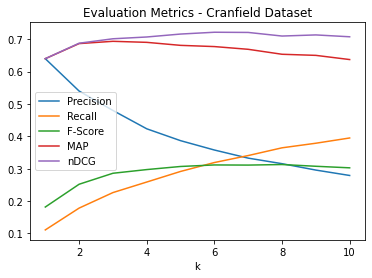

In [40]:
cosine_smiliratity_values_VSM = return_cosine_similarity(D_carn,Query_rep)
doc_IDs_ordered_VSM=return_orderded_docs(cosine_smiliratity_values_VSM)
Model_VSM=EvaluateSystem(doc_IDs_ordered_VSM)

#Applying LSA Now

Apply SVD and find K using elbow method

In [41]:
Doc_tf_id=D_carn
print(Doc_tf_id.shape)

(1400, 8839)


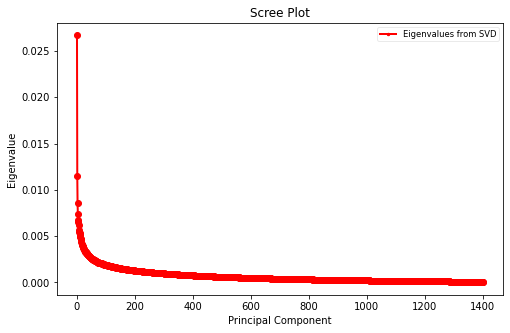

In [42]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


U, S, VT = np.linalg.svd(Doc_tf_id) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(1400) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [43]:
print(U.shape, S.shape ,VT.shape, Doc_tf_id.shape)

(1400, 1400) (1400,) (8839, 8839) (1400, 8839)


U captures Doc x Doc similarity, V captures term x term similarity

In [44]:
Query_rep=np.zeros((len(queries),vocab_size_carn))
print(Query_rep[2,:].shape)

(8839,)


In [45]:
for i in range(len(queries)):
    qv=gen_query_vector(queries[i],vocab_carn,DF_carn,len(all_docs))
    Query_rep[i,:]= qv

In [46]:
VT_inv=np.linalg.pinv(VT)

In [47]:
s_inverse = np.reciprocal(S)
S_inverse=np.diag(s_inverse)

#K versus nDCG

(225, 100) (1400, 100)
225
[486, 359, 51, 184, 874, 12, 13, 56, 327, 817, 573, 577, 818, 57, 875, 1186, 332, 47, 1169, 1168, 884, 756, 102, 925, 46, 540, 879, 880, 541, 253, 663, 878, 1305, 1165, 572, 1361, 27, 1310, 876, 584, 1311, 114, 746, 836, 280, 1158, 25, 747, 1170, 792, 497, 26, 726, 525, 1198, 1090, 1144, 1166, 1167, 568, 202, 800, 914, 491, 1268, 100, 415, 625, 729, 232, 591, 1261, 581, 719, 526, 68, 860, 837, 574, 141, 1089, 305, 1372, 1279, 29, 724, 801, 488, 686, 14, 630, 19, 1163, 334, 563, 124, 373, 585, 134, 819, 1290, 781, 1162, 820, 570, 804, 753, 401, 634, 313, 708, 66, 429, 99, 195, 1121, 665, 1335, 1309, 635, 252, 158, 37, 707, 462, 495, 238, 908, 508, 1155, 1362, 1111, 602, 1260, 1356, 509, 185, 960, 121, 1042, 78, 28, 494, 1378, 95, 1320, 1374, 180, 427, 11, 435, 156, 1200, 1072, 370, 718, 1219, 1380, 135, 342, 319, 388, 63, 1254, 681, 1041, 1007, 453, 1296, 1218, 1027, 240, 223, 1299, 650, 685, 1164, 881, 939, 214, 1231, 799, 649, 103, 230, 1136, 783, 896, 1147,

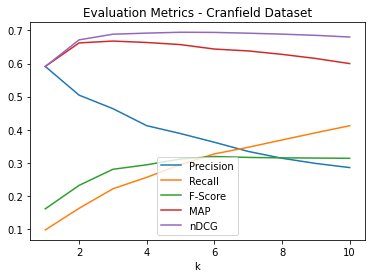

(225, 200) (1400, 200)
225
[486, 359, 56, 184, 13, 1186, 51, 12, 57, 577, 573, 817, 332, 327, 874, 253, 818, 663, 541, 180, 875, 584, 800, 102, 1169, 860, 429, 540, 491, 25, 27, 1268, 876, 494, 746, 1166, 415, 1144, 158, 280, 1361, 232, 747, 435, 878, 792, 630, 879, 563, 141, 509, 1167, 880, 884, 1165, 1310, 47, 78, 925, 1261, 1328, 114, 1158, 349, 1372, 1163, 100, 726, 1314, 358, 1168, 300, 665, 526, 657, 261, 1201, 1121, 981, 978, 1260, 243, 1380, 1164, 316, 1305, 373, 1279, 791, 960, 685, 719, 1155, 154, 525, 252, 1311, 585, 572, 939, 29, 28, 124, 41, 431, 686, 104, 374, 456, 1162, 378, 493, 218, 1212, 1219, 251, 911, 226, 169, 755, 1090, 285, 700, 724, 1197, 1072, 328, 92, 305, 260, 983, 142, 781, 423, 643, 508, 202, 1003, 172, 516, 406, 729, 798, 1280, 681, 783, 538, 14, 156, 101, 1236, 546, 687, 951, 629, 34, 944, 69, 319, 513, 1340, 591, 238, 1198, 982, 95, 329, 244, 1056, 19, 464, 214, 725, 407, 1026, 606, 242, 836, 596, 20, 1335, 626, 370, 1324, 62, 1304, 1064, 1091, 862, 1246

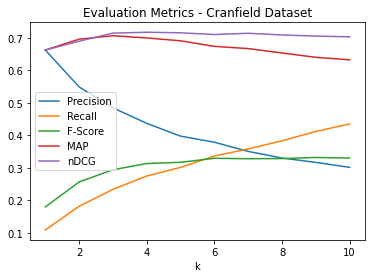

(225, 300) (1400, 300)
225
[359, 486, 13, 184, 56, 1186, 51, 12, 327, 57, 818, 1268, 573, 253, 792, 874, 1169, 663, 817, 332, 180, 540, 577, 435, 875, 584, 100, 25, 491, 878, 102, 349, 415, 860, 158, 1121, 172, 232, 665, 1361, 141, 1144, 747, 563, 925, 429, 47, 27, 154, 280, 316, 541, 374, 494, 800, 1372, 746, 1328, 1163, 876, 526, 78, 104, 1254, 456, 1197, 1261, 509, 1201, 92, 879, 1072, 884, 630, 251, 700, 407, 1310, 1158, 789, 378, 244, 114, 14, 28, 1165, 328, 811, 1191, 464, 260, 1167, 1042, 572, 300, 1135, 1155, 1298, 686, 69, 219, 261, 445, 1178, 758, 791, 218, 1168, 423, 358, 193, 252, 917, 618, 1380, 1212, 1320, 1147, 1236, 29, 1003, 687, 1198, 202, 124, 1314, 606, 103, 41, 1260, 960, 373, 914, 951, 729, 725, 156, 508, 309, 1263, 82, 1162, 681, 431, 776, 714, 195, 1362, 214, 799, 1056, 19, 329, 703, 297, 50, 62, 293, 726, 1374, 243, 783, 717, 285, 657, 947, 629, 403, 982, 370, 152, 944, 493, 255, 101, 1294, 1064, 603, 292, 711, 538, 52, 552, 685, 801, 89, 283, 209, 315, 798, 62

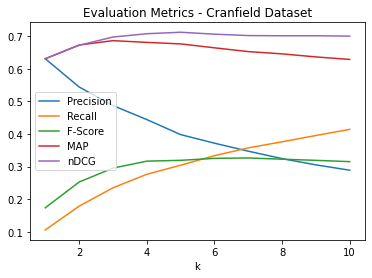

(225, 400) (1400, 400)
225
[359, 13, 486, 56, 1186, 1268, 184, 51, 12, 818, 573, 253, 57, 327, 792, 332, 663, 1169, 435, 316, 874, 154, 25, 584, 875, 817, 180, 100, 577, 878, 141, 172, 563, 860, 540, 491, 747, 1072, 665, 541, 158, 1121, 758, 374, 349, 102, 1042, 1144, 746, 14, 789, 1201, 232, 494, 1361, 800, 407, 700, 219, 429, 1254, 526, 78, 47, 300, 1178, 1310, 925, 415, 876, 261, 103, 260, 1362, 114, 799, 27, 104, 251, 1165, 729, 1261, 552, 509, 687, 152, 456, 1334, 252, 1314, 1328, 315, 445, 1212, 1332, 214, 884, 358, 811, 1198, 423, 879, 1163, 1003, 1372, 92, 403, 280, 585, 1191, 284, 1034, 593, 630, 1168, 951, 685, 165, 1158, 1380, 1155, 328, 714, 1135, 431, 497, 618, 606, 135, 1236, 1374, 1166, 657, 1167, 28, 798, 781, 686, 1298, 69, 1263, 755, 572, 370, 41, 443, 75, 917, 888, 1260, 297, 791, 1197, 29, 1090, 1396, 681, 82, 717, 20, 914, 274, 1242, 36, 756, 1147, 62, 240, 1009, 244, 1220, 84, 283, 672, 390, 1304, 801, 329, 1026, 1311, 309, 1091, 603, 193, 202, 776, 156, 19, 591, 

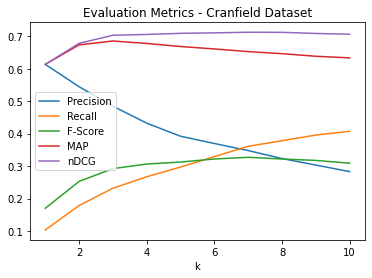

(225, 500) (1400, 500)
225
[13, 359, 486, 56, 1186, 51, 184, 1268, 12, 818, 253, 57, 792, 663, 332, 154, 1169, 327, 874, 25, 435, 172, 746, 100, 875, 817, 14, 316, 180, 141, 878, 584, 1361, 665, 573, 540, 758, 526, 563, 491, 1144, 219, 1042, 860, 349, 284, 152, 1198, 700, 1121, 1178, 158, 800, 102, 552, 747, 232, 1201, 494, 78, 925, 374, 300, 104, 456, 407, 1072, 1362, 876, 577, 429, 1003, 252, 261, 1261, 509, 114, 1332, 630, 280, 1334, 799, 789, 1254, 251, 1236, 260, 28, 315, 781, 370, 593, 423, 686, 541, 1372, 606, 879, 687, 1158, 1163, 103, 47, 995, 1380, 1155, 685, 415, 1212, 884, 888, 1328, 240, 811, 951, 917, 390, 713, 1310, 1165, 41, 84, 1168, 1255, 69, 214, 982, 431, 378, 193, 634, 445, 373, 358, 20, 1034, 27, 729, 1026, 497, 1311, 585, 1396, 1147, 34, 404, 801, 1167, 657, 29, 1191, 756, 603, 672, 156, 1320, 62, 1374, 1196, 759, 883, 525, 681, 92, 633, 165, 75, 306, 124, 274, 264, 1157, 1220, 410, 328, 453, 1197, 329, 1294, 439, 947, 309, 1263, 755, 945, 331, 804, 292, 1375, 44

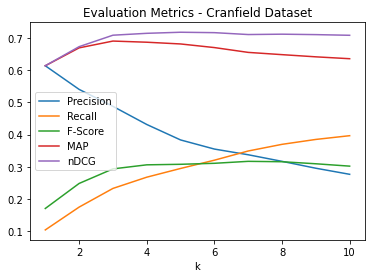

(225, 600) (1400, 600)
225
[359, 13, 56, 1186, 486, 51, 1268, 12, 184, 665, 154, 253, 663, 792, 818, 746, 327, 57, 25, 172, 141, 435, 874, 316, 875, 332, 1169, 219, 540, 1361, 758, 584, 817, 180, 573, 100, 14, 349, 878, 1144, 491, 526, 1198, 1201, 552, 1072, 456, 284, 494, 700, 1178, 747, 280, 1003, 509, 1261, 1042, 1121, 152, 563, 315, 1362, 800, 260, 925, 860, 789, 374, 407, 300, 1334, 1332, 261, 1372, 232, 1212, 429, 1254, 78, 114, 104, 252, 577, 685, 799, 158, 102, 1034, 630, 1158, 879, 47, 1163, 370, 876, 390, 686, 165, 1167, 657, 982, 634, 593, 251, 687, 781, 193, 378, 884, 34, 951, 672, 214, 415, 497, 431, 410, 585, 729, 1236, 888, 404, 423, 606, 1026, 1155, 445, 756, 1165, 811, 525, 69, 27, 28, 103, 41, 264, 522, 1168, 1310, 29, 1255, 1147, 1191, 1380, 1311, 513, 1252, 1114, 373, 804, 713, 964, 329, 311, 883, 1396, 439, 1063, 572, 1197, 123, 84, 453, 1320, 1335, 124, 140, 83, 1292, 1313, 1196, 810, 603, 629, 1328, 358, 242, 994, 331, 995, 493, 1012, 292, 274, 960, 490, 917, 195

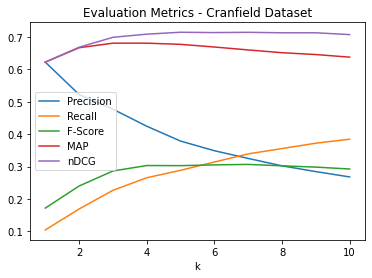

(225, 700) (1400, 700)
225
[359, 13, 56, 1186, 12, 51, 1268, 486, 665, 154, 746, 663, 141, 184, 253, 435, 792, 327, 874, 172, 100, 758, 1361, 14, 316, 540, 180, 332, 875, 25, 818, 1169, 57, 817, 1201, 219, 1144, 781, 1362, 494, 526, 573, 1178, 584, 1198, 1072, 349, 261, 878, 284, 552, 456, 700, 1003, 1365, 491, 1121, 370, 404, 104, 509, 789, 280, 1042, 374, 78, 563, 260, 800, 1034, 860, 431, 114, 1261, 429, 685, 158, 1372, 1332, 1212, 879, 1252, 378, 407, 925, 423, 315, 1311, 577, 1254, 415, 951, 1334, 232, 390, 593, 747, 1163, 681, 445, 876, 102, 152, 1165, 888, 995, 686, 47, 35, 1380, 300, 193, 1155, 497, 1197, 1026, 306, 311, 1191, 756, 34, 1167, 410, 283, 27, 799, 657, 358, 633, 811, 884, 917, 1147, 1168, 240, 28, 1251, 606, 251, 1184, 165, 626, 525, 572, 513, 1236, 50, 1114, 243, 1164, 41, 69, 1158, 29, 883, 630, 1063, 1328, 2, 1298, 687, 1396, 1337, 1335, 1194, 490, 204, 1320, 274, 755, 36, 214, 216, 103, 33, 373, 75, 211, 264, 140, 713, 629, 634, 1310, 84, 923, 82, 541, 499, 585

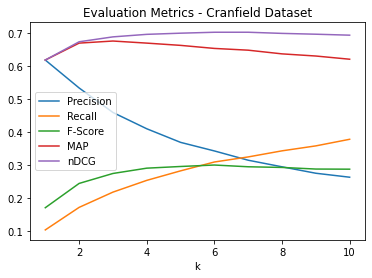

(225, 800) (1400, 800)
225
[359, 13, 56, 1186, 51, 12, 665, 1268, 746, 154, 486, 663, 184, 141, 435, 14, 253, 540, 792, 1365, 1361, 172, 25, 327, 818, 219, 758, 180, 100, 1178, 800, 875, 781, 874, 404, 332, 1362, 370, 817, 1169, 57, 284, 584, 1144, 1201, 552, 573, 1155, 494, 349, 878, 456, 526, 1003, 1072, 1212, 316, 685, 491, 35, 300, 509, 1198, 1121, 1261, 789, 114, 1042, 415, 158, 577, 700, 1184, 747, 888, 261, 563, 374, 390, 1252, 78, 429, 1165, 407, 104, 280, 1311, 1251, 260, 1034, 1372, 860, 879, 1254, 1334, 1332, 1197, 47, 951, 1304, 1163, 378, 423, 1236, 431, 410, 165, 27, 876, 686, 593, 681, 1026, 858, 687, 626, 717, 811, 1164, 29, 306, 69, 995, 1380, 445, 925, 358, 232, 1396, 1147, 917, 1294, 315, 204, 28, 102, 1158, 214, 283, 252, 1168, 251, 884, 1335, 633, 1181, 34, 490, 41, 713, 1167, 216, 585, 1298, 634, 294, 525, 240, 1191, 135, 311, 169, 883, 2, 755, 174, 1012, 156, 923, 1124, 1263, 121, 452, 397, 799, 1260, 152, 624, 75, 756, 142, 1375, 1063, 513, 439, 193, 1066, 1194,

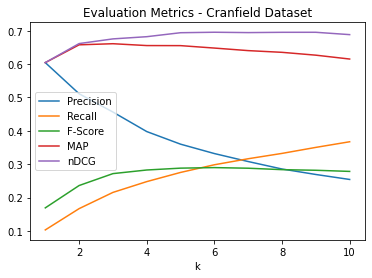

(225, 900) (1400, 900)
225
[359, 13, 56, 665, 1186, 51, 12, 1268, 746, 663, 154, 486, 1365, 141, 435, 172, 540, 253, 184, 1361, 404, 25, 14, 758, 818, 781, 180, 1178, 327, 552, 792, 1144, 349, 219, 875, 874, 584, 1169, 817, 35, 1201, 100, 284, 573, 332, 1003, 78, 685, 563, 800, 494, 1362, 1304, 57, 860, 1198, 878, 158, 261, 1184, 526, 509, 390, 747, 370, 415, 1311, 300, 789, 104, 1042, 1072, 1155, 456, 316, 1252, 114, 888, 407, 1236, 1334, 577, 1121, 1212, 374, 491, 1332, 1164, 1191, 1261, 700, 429, 252, 378, 280, 1034, 165, 1181, 858, 1372, 260, 876, 687, 1163, 879, 1251, 1260, 1026, 452, 315, 681, 995, 358, 686, 1197, 410, 923, 232, 925, 1396, 431, 1165, 633, 251, 216, 240, 593, 1012, 41, 209, 306, 490, 951, 193, 174, 1167, 884, 630, 204, 27, 811, 445, 1168, 397, 214, 903, 142, 1294, 1158, 513, 47, 1335, 28, 283, 713, 717, 883, 102, 2, 34, 755, 704, 497, 1063, 947, 62, 1124, 525, 29, 226, 152, 966, 1298, 274, 946, 917, 156, 1196, 423, 973, 1254, 657, 626, 986, 1071, 285, 1161, 294, 3

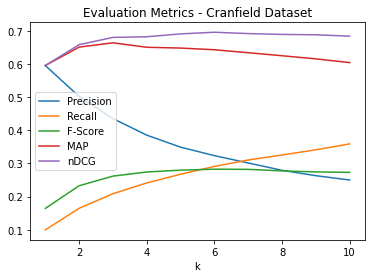

(225, 1000) (1400, 1000)
225
[359, 665, 13, 56, 1186, 51, 746, 12, 1268, 663, 154, 486, 1365, 404, 141, 253, 435, 540, 552, 184, 172, 1361, 349, 818, 35, 1184, 781, 1178, 758, 180, 1304, 792, 874, 14, 25, 219, 573, 1144, 875, 327, 817, 284, 1169, 78, 332, 584, 57, 1362, 1311, 860, 685, 456, 158, 1201, 390, 800, 1003, 747, 509, 407, 995, 494, 526, 415, 878, 100, 261, 789, 563, 104, 1121, 300, 1155, 316, 577, 1042, 681, 491, 114, 888, 1334, 260, 1396, 1198, 1034, 686, 429, 1332, 165, 879, 410, 1236, 1212, 374, 858, 1261, 1072, 315, 1252, 923, 811, 251, 252, 687, 951, 633, 358, 280, 925, 1197, 876, 1260, 378, 1294, 1251, 1181, 1026, 1372, 1165, 240, 142, 1191, 513, 283, 370, 445, 431, 232, 1066, 195, 452, 903, 1012, 212, 1167, 630, 216, 1168, 69, 883, 1164, 397, 700, 1158, 214, 1335, 306, 311, 28, 884, 713, 982, 593, 27, 973, 588, 209, 152, 1163, 41, 756, 34, 285, 755, 657, 135, 917, 329, 53, 1263, 345, 29, 197, 211, 497, 163, 704, 1124, 464, 1385, 576, 1226, 1063, 525, 1166, 585, 1196, 1

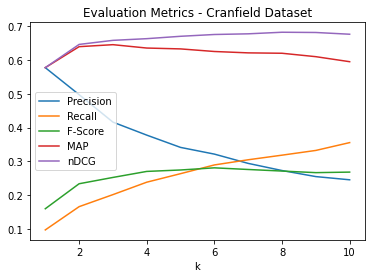

(225, 1100) (1400, 1100)
225
[359, 665, 13, 56, 1186, 51, 746, 12, 1268, 663, 35, 154, 1365, 486, 404, 141, 435, 552, 1361, 540, 253, 349, 184, 1304, 172, 781, 1184, 14, 1178, 25, 180, 758, 792, 78, 573, 818, 874, 1144, 219, 875, 817, 327, 284, 1169, 584, 1362, 995, 685, 1003, 407, 860, 390, 100, 1311, 800, 1155, 491, 57, 509, 332, 878, 300, 789, 415, 747, 494, 526, 104, 158, 1121, 1201, 577, 252, 1034, 260, 686, 563, 316, 456, 1042, 1181, 261, 1191, 888, 923, 1332, 1334, 1072, 374, 410, 1396, 681, 429, 1198, 811, 687, 879, 633, 1252, 114, 358, 1212, 1261, 1260, 1197, 251, 1026, 378, 630, 925, 1251, 329, 240, 280, 593, 165, 1294, 69, 858, 232, 315, 1165, 1380, 1236, 1163, 1372, 397, 423, 214, 726, 1164, 431, 152, 497, 903, 951, 445, 1168, 209, 452, 883, 283, 212, 306, 311, 52, 700, 1158, 576, 309, 334, 876, 1012, 884, 973, 195, 84, 1167, 1066, 756, 588, 34, 135, 966, 1385, 662, 193, 1335, 713, 704, 211, 1166, 285, 274, 1124, 331, 999, 522, 142, 1071, 1063, 174, 1196, 513, 585, 41, 1226

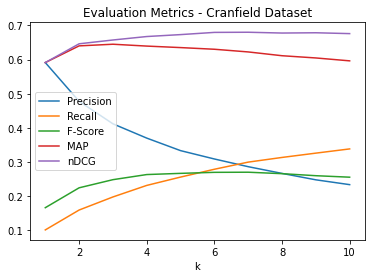

500


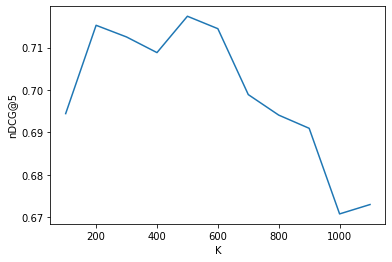

In [48]:
y=[]
k_max=100
ndcg_5=0.0
max_ndcg=0
for K in range(100,1200,100):
    query_rep_k = np.dot(Query_rep,np.dot(VT_inv[:,:K],S_inverse[:K,:K]))
    docs_rep_k = np.dot(U[:,:K],np.diag(S)[:K,:K])
    print(query_rep_k.shape,docs_rep_k.shape)
    cosine_smiliratity_values_LSA = return_cosine_similarity(docs_rep_k,query_rep_k)
    doc_IDs_ordered_LSA=return_orderded_docs(cosine_smiliratity_values_LSA)
    Model_LSA=EvaluateSystem(doc_IDs_ordered_LSA)
    ndcg_5=Model_LSA[4][4]
    y.append(ndcg_5)
    if(ndcg_5>max_ndcg):
        max_ndcg=ndcg_5
        k_max=K

    
x=range(100,1200,100)
plt.plot(x, y)
# naming the x axis
plt.xlabel('K')
# naming the y axis
plt.ylabel('nDCG@5')
print(k_max)

In [49]:
K=k_max

In [50]:
query_rep_k = np.dot(Query_rep,np.dot(VT_inv[:,:K],S_inverse[:K,:K]))
docs_rep_k = np.dot(U[:,:K],np.diag(S)[:K,:K])
print(query_rep_k.shape,docs_rep_k.shape)

(225, 500) (1400, 500)


225
[13, 359, 486, 56, 1186, 51, 184, 1268, 12, 818, 253, 57, 792, 663, 332, 154, 1169, 327, 874, 25, 435, 172, 746, 100, 875, 817, 14, 316, 180, 141, 878, 584, 1361, 665, 573, 540, 758, 526, 563, 491, 1144, 219, 1042, 860, 349, 284, 152, 1198, 700, 1121, 1178, 158, 800, 102, 552, 747, 232, 1201, 494, 78, 925, 374, 300, 104, 456, 407, 1072, 1362, 876, 577, 429, 1003, 252, 261, 1261, 509, 114, 1332, 630, 280, 1334, 799, 789, 1254, 251, 1236, 260, 28, 315, 781, 370, 593, 423, 686, 541, 1372, 606, 879, 687, 1158, 1163, 103, 47, 995, 1380, 1155, 685, 415, 1212, 884, 888, 1328, 240, 811, 951, 917, 390, 713, 1310, 1165, 41, 84, 1168, 1255, 69, 214, 982, 431, 378, 193, 634, 445, 373, 358, 20, 1034, 27, 729, 1026, 497, 1311, 585, 1396, 1147, 34, 404, 801, 1167, 657, 29, 1191, 756, 603, 672, 156, 1320, 62, 1374, 1196, 759, 883, 525, 681, 92, 633, 165, 75, 306, 124, 274, 264, 1157, 1220, 410, 328, 453, 1197, 329, 1294, 439, 947, 309, 1263, 755, 945, 331, 804, 292, 1375, 443, 1313, 1195, 170, 305

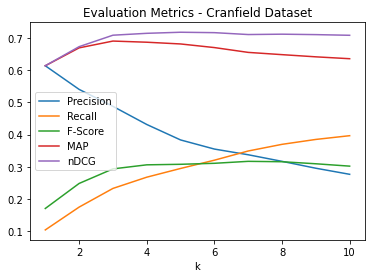

In [51]:
cosine_smiliratity_values_LSA = return_cosine_similarity(docs_rep_k,query_rep_k)
doc_IDs_ordered_LSA=return_orderded_docs(cosine_smiliratity_values_LSA)
Model_LSA=EvaluateSystem(doc_IDs_ordered_LSA)

#Comparison of Both Models for K = 500

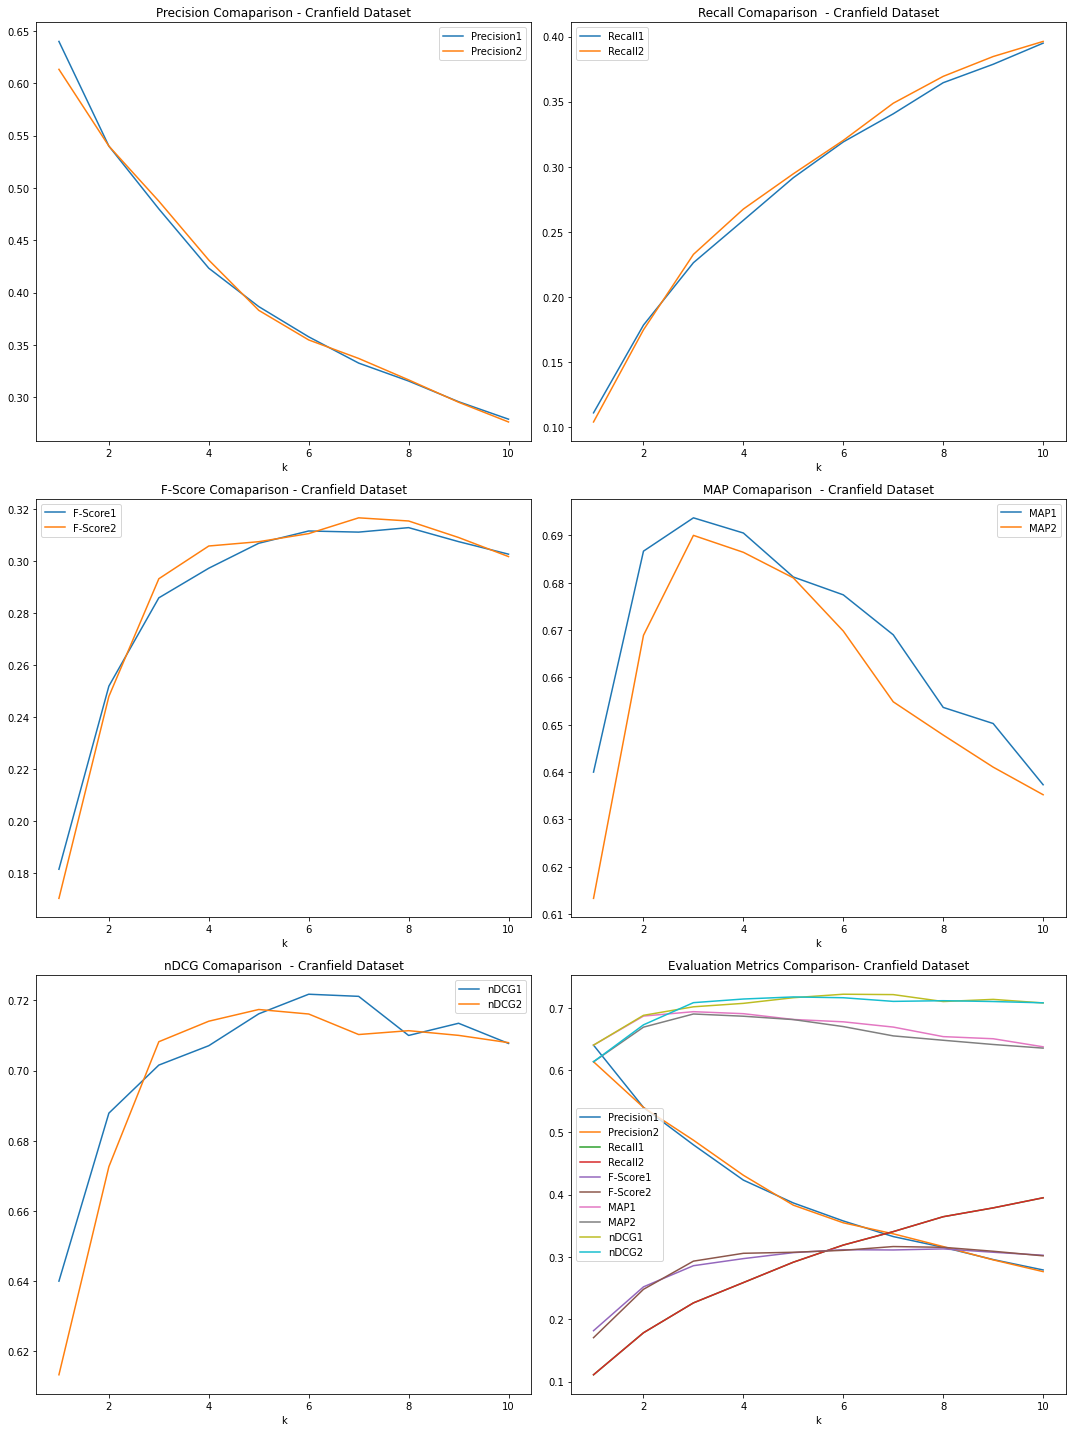

In [52]:
compare_results(Model_VSM,Model_LSA)

Yellow color rows correspond to vector space model and White Color rows to LSA

In [53]:
from IPython.display import display, HTML
import pandas as pd
df = pd.DataFrame([Model_VSM[0],Model_LSA[0], Model_VSM[1],Model_LSA[1], Model_VSM[2],Model_LSA[2],Model_VSM[3], Model_LSA[3],Model_VSM[4],Model_LSA[4]], columns=['@1','@2','@3','@4','@5','@6','@7','@8','@9','@10'])
df.index=['Precision1','Precision2', 'Recall1','Recall2','F-Score1','F-Score2','MAP1','MAP2','nDCG1','nDCG2']
df.style.apply(lambda x: ['background: yellow' if x.name in ['Precision1','Recall1','F-Score1','MAP1','nDCG1'] 
                              else '' for i in x], 
                   axis=1)


,@1,@2,@3,@4,@5,@6,@7,@8,@9,@10
Precision1,0.640000,0.540000,0.480000,0.423333,0.386667,0.357778,0.332698,0.315556,0.295802,0.279111
Precision2,0.613333,0.540000,0.487407,0.431111,0.383111,0.354815,0.337143,0.316667,0.295309,0.276444
Recall1,0.110867,0.178303,0.226265,0.258846,0.291581,0.319084,0.340668,0.364581,0.378745,0.394980
Recall2,0.103859,0.174670,0.232645,0.267500,0.294586,0.320256,0.348809,0.369462,0.384700,0.396304
F-Score1,0.181596,0.252003,0.285943,0.297330,0.306921,0.311639,0.311208,0.312930,0.307548,0.302731
F-Score2,0.170406,0.248059,0.293279,0.305869,0.307523,0.310630,0.316700,0.315485,0.309140,0.301797
MAP1,0.640000,0.686667,0.693704,0.690494,0.681204,0.677436,0.668996,0.653665,0.650262,0.637331
MAP2,0.613333,0.668889,0.690000,0.686420,0.681019,0.669788,0.654844,0.647830,0.641052,0.635222
nDCG1,0.640000,0.687859,0.701543,0.707067,0.716142,0.721726,0.721123,0.709983,0.713454,0.707709
nDCG2,0.613333,0.672608,0.708199,0.714041,0.717377,0.716091,0.710246,0.711341,0.710007,0.707936


#Comparison of Both Models for K = 200

In [54]:
K=200

In [55]:
query_rep_k = np.dot(Query_rep,np.dot(VT_inv[:,:K],S_inverse[:K,:K]))
docs_rep_k = np.dot(U[:,:K],np.diag(S)[:K,:K])
print(query_rep_k.shape,docs_rep_k.shape)

(225, 200) (1400, 200)


225
[486, 359, 56, 184, 13, 1186, 51, 12, 57, 577, 573, 817, 332, 327, 874, 253, 818, 663, 541, 180, 875, 584, 800, 102, 1169, 860, 429, 540, 491, 25, 27, 1268, 876, 494, 746, 1166, 415, 1144, 158, 280, 1361, 232, 747, 435, 878, 792, 630, 879, 563, 141, 509, 1167, 880, 884, 1165, 1310, 47, 78, 925, 1261, 1328, 114, 1158, 349, 1372, 1163, 100, 726, 1314, 358, 1168, 300, 665, 526, 657, 261, 1201, 1121, 981, 978, 1260, 243, 1380, 1164, 316, 1305, 373, 1279, 791, 960, 685, 719, 1155, 154, 525, 252, 1311, 585, 572, 939, 29, 28, 124, 41, 431, 686, 104, 374, 456, 1162, 378, 493, 218, 1212, 1219, 251, 911, 226, 169, 755, 1090, 285, 700, 724, 1197, 1072, 328, 92, 305, 260, 983, 142, 781, 423, 643, 508, 202, 1003, 172, 516, 406, 729, 798, 1280, 681, 783, 538, 14, 156, 101, 1236, 546, 687, 951, 629, 34, 944, 69, 319, 513, 1340, 591, 238, 1198, 982, 95, 329, 244, 1056, 19, 464, 214, 725, 407, 1026, 606, 242, 836, 596, 20, 1335, 626, 370, 1324, 62, 1304, 1064, 1091, 862, 1246, 789, 345, 1379, 1270,

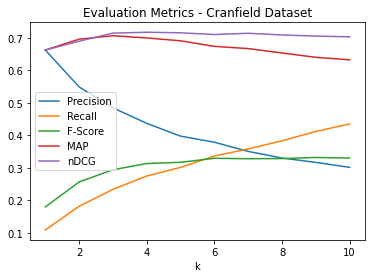

In [56]:
cosine_smiliratity_values_LSA = return_cosine_similarity(docs_rep_k,query_rep_k)
doc_IDs_ordered_LSA=return_orderded_docs(cosine_smiliratity_values_LSA)
Model_LSA=EvaluateSystem(doc_IDs_ordered_LSA)

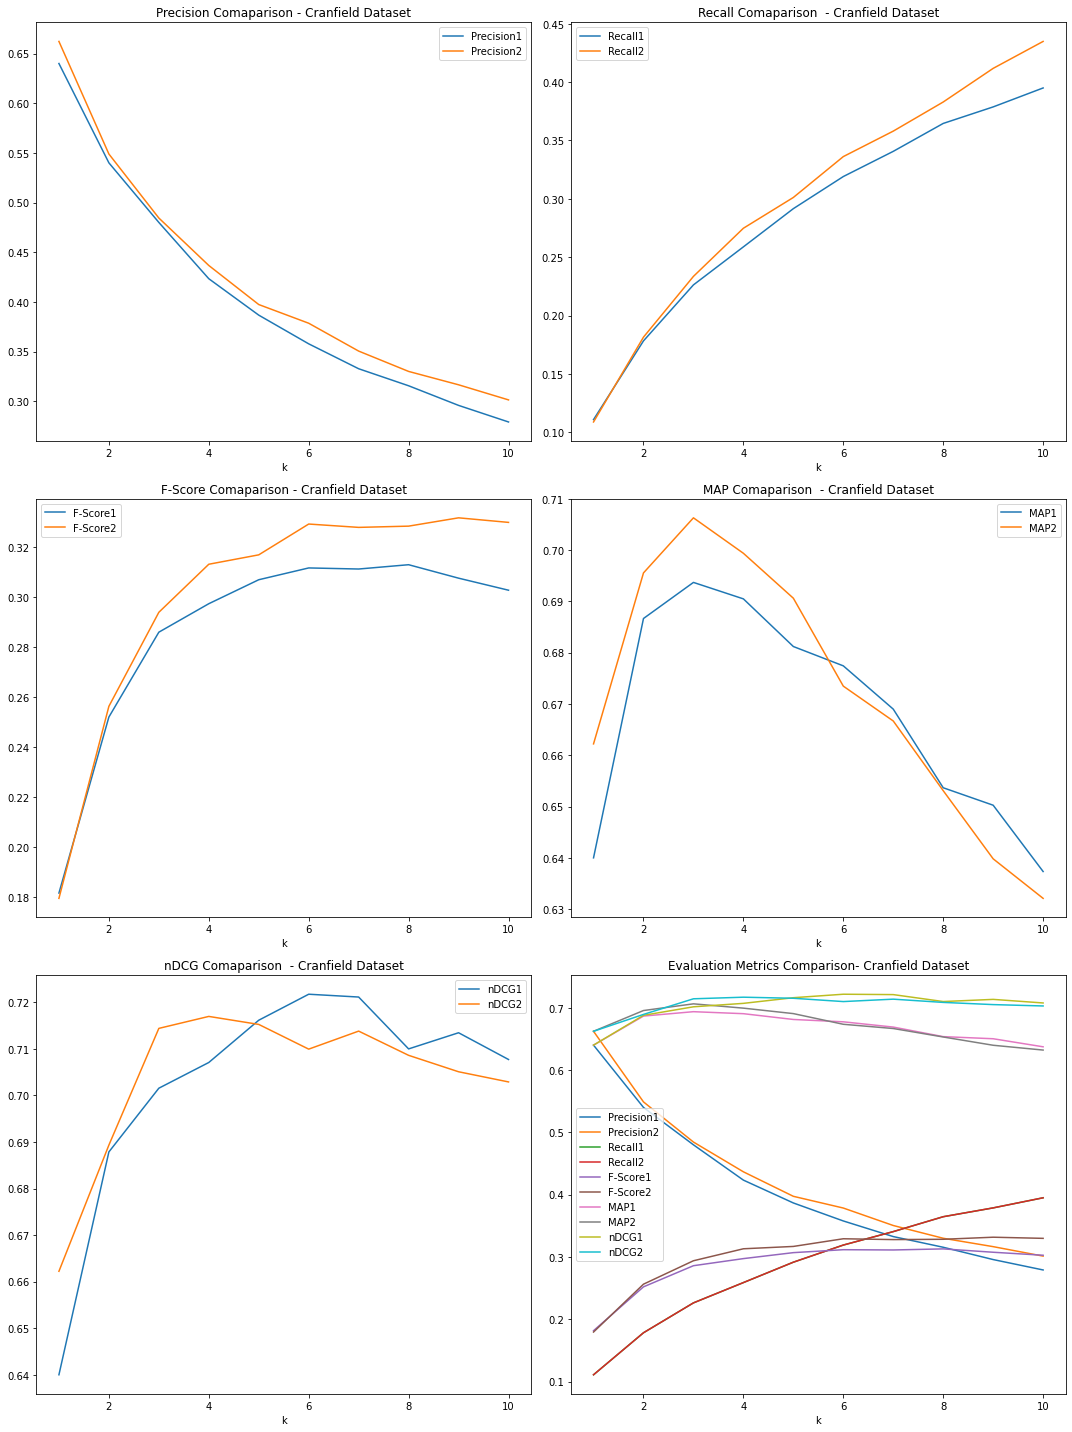

In [57]:
compare_results(Model_VSM,Model_LSA)

Yellow color rows correspond to vector space model and White Color rows to LSA

In [58]:
from IPython.display import display, HTML
import pandas as pd
df = pd.DataFrame([Model_VSM[0],Model_LSA[0], Model_VSM[1],Model_LSA[1], Model_VSM[2],Model_LSA[2],Model_VSM[3], Model_LSA[3],Model_VSM[4],Model_LSA[4]], columns=['@1','@2','@3','@4','@5','@6','@7','@8','@9','@10'])
df.index=['Precision1','Precision2', 'Recall1','Recall2','F-Score1','F-Score2','MAP1','MAP2','nDCG1','nDCG2']
df.style.apply(lambda x: ['background: yellow' if x.name in ['Precision1','Recall1','F-Score1','MAP1','nDCG1'] 
                              else '' for i in x], 
                   axis=1)


,@1,@2,@3,@4,@5,@6,@7,@8,@9,@10
Precision1,0.640000,0.540000,0.480000,0.423333,0.386667,0.357778,0.332698,0.315556,0.295802,0.279111
Precision2,0.662222,0.548889,0.484444,0.436667,0.397333,0.378519,0.350476,0.330000,0.316543,0.301333
Recall1,0.110867,0.178303,0.226265,0.258846,0.291581,0.319084,0.340668,0.364581,0.378745,0.394980
Recall2,0.108834,0.181512,0.233555,0.274796,0.301169,0.336172,0.357998,0.382948,0.411756,0.434839
F-Score1,0.181596,0.252003,0.285943,0.297330,0.306921,0.311639,0.311208,0.312930,0.307548,0.302731
F-Score2,0.179473,0.256291,0.293895,0.313119,0.316876,0.329198,0.327861,0.328358,0.331683,0.329858
MAP1,0.640000,0.686667,0.693704,0.690494,0.681204,0.677436,0.668996,0.653665,0.650262,0.637331
MAP2,0.662222,0.695556,0.706296,0.699383,0.690623,0.673481,0.666685,0.653096,0.639810,0.632098
nDCG1,0.640000,0.687859,0.701543,0.707067,0.716142,0.721726,0.721123,0.709983,0.713454,0.707709
nDCG2,0.662222,0.689328,0.714391,0.716961,0.715243,0.709934,0.713805,0.708603,0.705075,0.702891


#Convex combination of Query expansion with LSA and VSM

225
[486, 359, 56, 13, 184, 1186, 51, 12, 57, 577, 817, 573, 332, 327, 874, 253, 818, 663, 180, 875, 541, 584, 800, 102, 1169, 540, 860, 429, 491, 25, 1268, 27, 746, 876, 494, 1144, 1361, 415, 158, 435, 1166, 747, 280, 878, 792, 232, 879, 141, 630, 563, 509, 884, 1167, 880, 1165, 78, 1310, 47, 925, 1261, 114, 1328, 349, 665, 1163, 1158, 100, 1372, 726, 1168, 358, 1314, 526, 300, 657, 1121, 261, 1201, 981, 1260, 243, 978, 316, 1380, 1164, 154, 685, 1305, 373, 1155, 791, 960, 252, 1311, 1279, 719, 525, 585, 29, 686, 572, 431, 104, 28, 41, 374, 124, 456, 378, 939, 1212, 1162, 251, 493, 218, 226, 911, 755, 1219, 1090, 700, 285, 169, 781, 1197, 260, 1072, 14, 172, 724, 305, 328, 1003, 423, 142, 92, 643, 202, 983, 681, 508, 516, 729, 798, 687, 1236, 406, 156, 1280, 951, 546, 783, 101, 538, 629, 69, 944, 513, 34, 407, 591, 1198, 1340, 238, 329, 1304, 214, 982, 1026, 464, 606, 319, 1056, 244, 725, 95, 242, 19, 62, 1335, 370, 836, 789, 626, 20, 1064, 1091, 862, 596, 1324, 1246, 345, 1334, 240, 

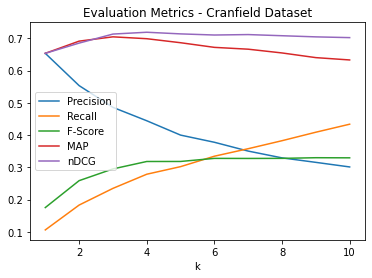

225
[486, 359, 56, 13, 184, 1186, 51, 12, 57, 817, 573, 577, 332, 327, 253, 874, 663, 818, 180, 875, 541, 584, 800, 1169, 102, 540, 25, 860, 1268, 429, 491, 746, 27, 876, 494, 1144, 435, 1361, 878, 747, 792, 158, 415, 280, 1166, 141, 232, 879, 509, 563, 630, 884, 1167, 665, 78, 1165, 925, 880, 1310, 47, 1261, 349, 114, 100, 1163, 1328, 1158, 1372, 726, 1168, 526, 358, 1314, 300, 1121, 261, 1201, 657, 154, 316, 685, 1260, 243, 1164, 1380, 981, 1155, 1305, 978, 1311, 252, 373, 791, 960, 686, 29, 525, 104, 431, 585, 374, 719, 1279, 572, 41, 456, 378, 1212, 124, 28, 14, 251, 781, 1162, 172, 700, 939, 755, 226, 260, 1090, 285, 911, 493, 218, 1197, 1219, 1003, 169, 1072, 305, 423, 328, 202, 724, 142, 643, 681, 687, 1236, 92, 729, 516, 798, 951, 156, 1304, 508, 983, 407, 406, 1280, 546, 69, 513, 1198, 101, 944, 783, 591, 214, 629, 34, 329, 238, 1026, 1340, 982, 538, 62, 606, 789, 464, 370, 1335, 725, 242, 1056, 244, 836, 95, 626, 1064, 19, 1091, 20, 319, 1334, 888, 240, 862, 1042, 811, 799, 3

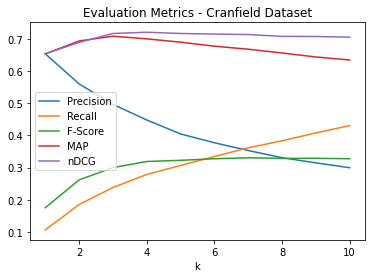

225
[486, 359, 56, 13, 184, 1186, 51, 12, 57, 817, 573, 577, 332, 327, 663, 253, 874, 818, 875, 180, 584, 541, 800, 1169, 1268, 540, 25, 102, 860, 746, 429, 491, 27, 435, 876, 1361, 1144, 878, 494, 792, 747, 141, 158, 415, 879, 665, 280, 232, 1166, 509, 884, 563, 630, 78, 1167, 925, 1165, 880, 349, 100, 1310, 47, 1163, 114, 1261, 1158, 1328, 1372, 526, 1168, 726, 358, 154, 1121, 300, 1314, 1201, 261, 657, 685, 316, 1155, 1260, 1164, 1380, 243, 1311, 14, 252, 1305, 686, 981, 104, 29, 374, 431, 373, 781, 791, 960, 525, 978, 172, 585, 456, 1212, 378, 41, 251, 719, 572, 124, 28, 1279, 260, 700, 1162, 1003, 755, 226, 285, 1090, 1197, 911, 493, 1072, 218, 939, 1304, 202, 169, 305, 1219, 423, 687, 681, 328, 142, 407, 1236, 643, 724, 951, 729, 516, 156, 798, 69, 1198, 92, 513, 214, 508, 546, 1280, 944, 591, 406, 789, 1026, 329, 62, 34, 983, 629, 238, 101, 1340, 982, 606, 370, 1178, 783, 464, 1335, 1042, 242, 1334, 725, 888, 1056, 811, 1064, 626, 1091, 836, 240, 538, 244, 799, 84, 20, 95, 19, 3

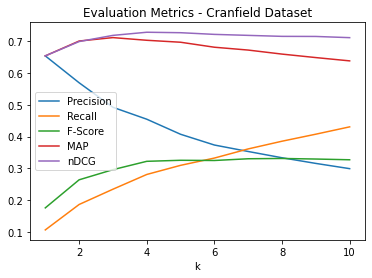

225
[359, 486, 13, 56, 184, 1186, 51, 12, 817, 57, 573, 577, 327, 332, 663, 253, 874, 818, 875, 180, 1268, 584, 1169, 25, 800, 540, 746, 541, 860, 102, 429, 491, 435, 1361, 665, 1144, 878, 792, 876, 27, 141, 747, 494, 158, 415, 879, 232, 280, 509, 884, 1166, 78, 563, 925, 630, 1167, 1165, 100, 349, 1163, 114, 880, 154, 526, 1261, 47, 1310, 1158, 1168, 1372, 1328, 726, 1121, 358, 1201, 685, 300, 261, 316, 14, 1314, 657, 1155, 1164, 1311, 781, 1380, 1260, 172, 686, 252, 104, 243, 374, 29, 1305, 431, 1212, 456, 525, 378, 373, 791, 251, 981, 960, 585, 41, 260, 1003, 124, 572, 700, 1304, 719, 28, 978, 755, 1162, 1197, 285, 226, 1090, 1279, 407, 202, 687, 1072, 911, 681, 305, 423, 1236, 493, 218, 169, 951, 643, 1219, 142, 1178, 328, 939, 1198, 214, 69, 789, 729, 156, 513, 724, 516, 798, 62, 1026, 591, 329, 944, 1042, 546, 370, 34, 508, 606, 238, 1280, 1334, 92, 982, 811, 888, 406, 1335, 1340, 629, 464, 1362, 240, 101, 242, 1064, 799, 1091, 725, 84, 626, 783, 552, 983, 219, 1191, 836, 1056, 2

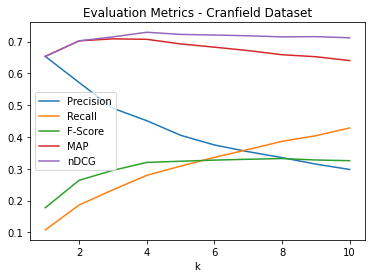

225
[359, 486, 13, 56, 184, 1186, 51, 12, 817, 57, 573, 577, 327, 332, 663, 253, 874, 818, 875, 180, 1268, 746, 25, 1169, 584, 540, 800, 665, 860, 541, 435, 102, 429, 1361, 491, 878, 792, 141, 1144, 747, 876, 27, 494, 158, 879, 415, 232, 884, 280, 509, 78, 563, 925, 1166, 100, 154, 349, 1165, 1167, 630, 1163, 526, 114, 1168, 1158, 14, 1261, 880, 726, 1372, 47, 1310, 1328, 685, 1121, 316, 1201, 358, 261, 300, 781, 172, 1155, 657, 1314, 1311, 686, 104, 1164, 252, 1380, 374, 1260, 29, 431, 1212, 243, 1304, 1305, 456, 251, 378, 1003, 260, 525, 585, 41, 791, 960, 700, 373, 124, 407, 572, 981, 1197, 1178, 28, 755, 285, 687, 719, 1162, 226, 1090, 202, 681, 1236, 1072, 978, 423, 305, 789, 911, 951, 1198, 214, 1042, 1279, 552, 69, 62, 643, 513, 1362, 142, 169, 493, 1026, 218, 328, 156, 729, 219, 329, 811, 591, 1334, 516, 370, 1219, 798, 888, 944, 606, 724, 240, 1335, 34, 546, 1191, 238, 982, 939, 1340, 464, 799, 84, 1280, 629, 508, 1332, 242, 1064, 1091, 406, 626, 52, 725, 756, 92, 836, 101, 10

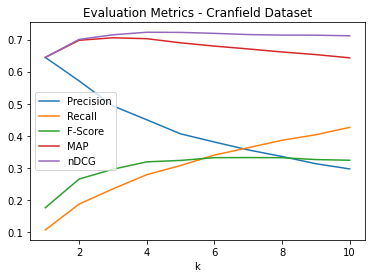

225
[359, 486, 13, 56, 51, 1186, 184, 12, 817, 573, 57, 577, 327, 663, 332, 253, 874, 818, 1268, 875, 180, 746, 665, 25, 540, 1169, 584, 435, 800, 860, 1361, 878, 141, 792, 1144, 429, 102, 541, 747, 491, 876, 879, 27, 158, 494, 415, 884, 78, 154, 509, 232, 280, 100, 925, 349, 563, 14, 1163, 1165, 526, 1166, 1167, 114, 1168, 630, 685, 1158, 726, 1121, 172, 1372, 781, 316, 1261, 1328, 880, 1201, 47, 261, 1310, 1155, 358, 300, 1304, 1311, 686, 104, 374, 252, 657, 1164, 431, 29, 1380, 1212, 1314, 1003, 456, 1178, 251, 1260, 260, 378, 243, 1305, 407, 700, 552, 525, 41, 585, 791, 687, 1197, 960, 124, 373, 681, 755, 202, 1362, 285, 1042, 789, 572, 219, 1090, 1236, 28, 226, 1162, 214, 1198, 1072, 62, 719, 951, 981, 423, 305, 69, 811, 1026, 513, 1334, 888, 911, 1191, 370, 329, 643, 591, 156, 240, 142, 729, 944, 606, 1332, 328, 1335, 169, 516, 798, 493, 978, 799, 84, 1279, 218, 238, 34, 982, 546, 52, 464, 1340, 1219, 756, 1064, 1091, 242, 724, 626, 629, 1280, 725, 836, 508, 453, 50, 406, 1056, 3

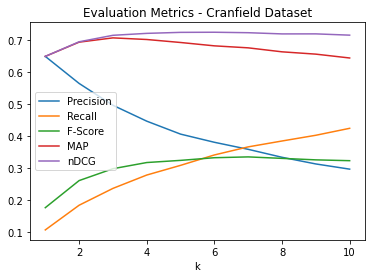

225
[359, 13, 486, 56, 51, 1186, 184, 12, 817, 573, 57, 663, 327, 253, 1268, 332, 577, 665, 874, 818, 746, 875, 180, 25, 540, 1169, 435, 584, 141, 1361, 878, 792, 860, 800, 1144, 747, 429, 154, 491, 876, 102, 879, 14, 158, 541, 78, 884, 27, 494, 415, 509, 100, 232, 925, 349, 280, 526, 563, 1163, 685, 172, 1165, 781, 114, 1168, 1167, 1121, 316, 1166, 726, 1158, 630, 1304, 1372, 1201, 1155, 261, 1261, 1328, 1178, 686, 104, 358, 1311, 880, 47, 374, 552, 300, 1310, 1003, 252, 1212, 431, 29, 407, 260, 1164, 251, 456, 1380, 657, 378, 219, 1362, 700, 1260, 1314, 1042, 1305, 687, 243, 789, 41, 1197, 525, 681, 585, 202, 1236, 124, 755, 791, 285, 62, 214, 811, 960, 1198, 1191, 1090, 1334, 373, 226, 888, 951, 572, 69, 1026, 28, 1072, 1162, 513, 1332, 423, 370, 305, 240, 35, 329, 591, 719, 156, 606, 1335, 944, 799, 84, 643, 52, 911, 404, 729, 142, 758, 756, 981, 798, 238, 516, 982, 34, 328, 464, 1064, 284, 1091, 1340, 169, 546, 193, 242, 626, 493, 453, 218, 50, 634, 629, 135, 315, 725, 836, 1034, 

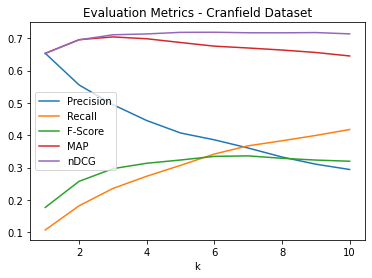

225
[359, 13, 56, 486, 51, 1186, 12, 184, 817, 665, 663, 1268, 573, 253, 746, 327, 57, 874, 332, 875, 818, 25, 180, 577, 435, 540, 1169, 141, 1361, 878, 792, 154, 584, 1144, 14, 860, 747, 800, 879, 429, 876, 78, 491, 158, 884, 100, 102, 509, 415, 349, 172, 494, 27, 925, 781, 526, 685, 232, 1163, 541, 280, 1304, 563, 1168, 316, 114, 1165, 552, 1178, 1121, 726, 1155, 1167, 1158, 1201, 261, 686, 104, 1372, 1311, 1166, 374, 1003, 630, 219, 407, 1362, 1261, 1328, 1212, 358, 252, 260, 431, 29, 300, 35, 251, 456, 1042, 47, 1164, 880, 378, 1380, 1310, 789, 700, 404, 687, 758, 657, 681, 811, 1191, 1260, 1197, 62, 202, 1305, 214, 1236, 41, 1334, 1198, 888, 284, 243, 1332, 525, 585, 1314, 755, 285, 1026, 69, 124, 951, 240, 513, 370, 1090, 226, 791, 960, 1365, 1072, 329, 423, 52, 799, 591, 84, 1162, 373, 572, 28, 305, 193, 1335, 606, 756, 944, 156, 1184, 643, 1034, 729, 634, 315, 238, 982, 497, 1064, 34, 142, 464, 1147, 911, 1091, 798, 883, 135, 516, 719, 1074, 453, 1340, 242, 593, 626, 1066, 1111

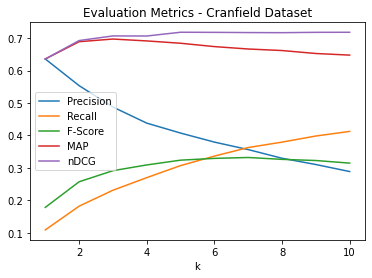

225
[359, 13, 56, 51, 1186, 486, 12, 184, 665, 1268, 817, 663, 746, 253, 573, 874, 327, 25, 875, 818, 435, 57, 332, 180, 540, 141, 14, 154, 1169, 1361, 878, 792, 577, 1144, 747, 860, 584, 879, 172, 78, 800, 100, 781, 876, 884, 429, 552, 158, 1304, 685, 349, 491, 526, 1178, 509, 925, 415, 1163, 494, 35, 102, 27, 232, 316, 1168, 1121, 280, 219, 563, 114, 1155, 1362, 404, 1165, 758, 407, 1003, 726, 686, 104, 1201, 374, 1158, 1311, 261, 541, 1167, 1042, 1365, 260, 1212, 1372, 284, 252, 431, 29, 251, 789, 456, 358, 687, 1261, 1328, 1191, 630, 378, 300, 811, 1166, 700, 1164, 1380, 1332, 62, 1334, 681, 888, 214, 1184, 1198, 202, 1236, 1197, 47, 880, 240, 1026, 657, 193, 41, 1310, 69, 370, 1305, 1260, 951, 513, 497, 755, 285, 52, 525, 585, 883, 799, 243, 329, 84, 1034, 390, 756, 124, 1090, 226, 591, 1335, 634, 315, 593, 606, 1072, 1147, 423, 1314, 195, 917, 791, 944, 305, 960, 1111, 1162, 156, 135, 1074, 1066, 28, 572, 75, 1064, 165, 982, 283, 238, 373, 1091, 1254, 729, 1294, 464, 453, 643, 19

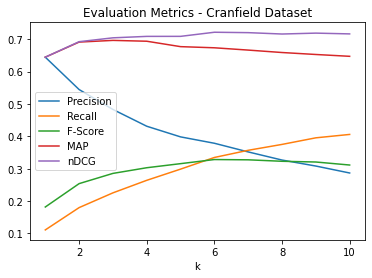

0.30000000000000004


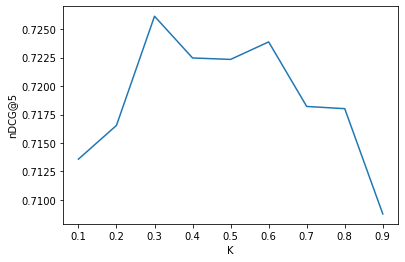

In [59]:
y=[]
alpha_max=0
ndcg_5=0.0
max_ndcg=0
for alpha in np.arange(0.1,1,0.1):
    cosine_similarity_values_mix = alpha*cosine_smiliratity_values_VSM + (1-alpha)*cosine_smiliratity_values_LSA
    doc_IDs_ordered_mix=return_orderded_docs(cosine_similarity_values_mix)
    Model_mix=EvaluateSystem(doc_IDs_ordered_mix)
    ndcg_5=Model_mix[4][4]
    y.append(ndcg_5)
    if(ndcg_5>max_ndcg):
        max_ndcg=ndcg_5
        alpha_max=alpha
x=np.arange(0.1,1,0.1)
plt.plot(x, y)
# naming the x axis
plt.xlabel('K')
# naming the y axis
plt.ylabel('nDCG@5')
print(alpha_max)

225
[486, 359, 56, 13, 184, 1186, 51, 12, 57, 817, 573, 577, 332, 327, 663, 253, 874, 818, 875, 180, 584, 541, 800, 1169, 1268, 540, 25, 102, 860, 746, 429, 491, 27, 435, 876, 1361, 1144, 878, 494, 792, 747, 141, 158, 415, 879, 665, 280, 232, 1166, 509, 884, 563, 630, 78, 1167, 925, 1165, 880, 349, 100, 1310, 47, 1163, 114, 1261, 1158, 1328, 1372, 526, 1168, 726, 358, 154, 1121, 300, 1314, 1201, 261, 657, 685, 316, 1155, 1260, 1164, 1380, 243, 1311, 14, 252, 1305, 686, 981, 104, 29, 374, 431, 373, 781, 791, 960, 525, 978, 172, 585, 456, 1212, 378, 41, 251, 719, 572, 124, 28, 1279, 260, 700, 1162, 1003, 755, 226, 285, 1090, 1197, 911, 493, 1072, 218, 939, 1304, 202, 169, 305, 1219, 423, 687, 681, 328, 142, 407, 1236, 643, 724, 951, 729, 516, 156, 798, 69, 1198, 92, 513, 214, 508, 546, 1280, 944, 591, 406, 789, 1026, 329, 62, 34, 983, 629, 238, 101, 1340, 982, 606, 370, 1178, 783, 464, 1335, 1042, 242, 1334, 725, 888, 1056, 811, 1064, 626, 1091, 836, 240, 538, 244, 799, 84, 20, 95, 19, 3

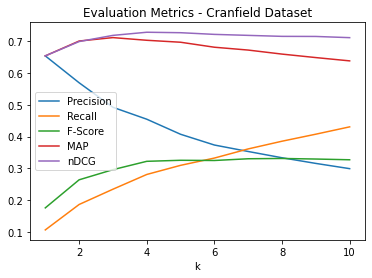

In [60]:
#So take alph_max =0.3
alpha = alpha_max
cosine_similarity_values_mix = alpha*cosine_smiliratity_values_VSM + (1-alpha)*cosine_smiliratity_values_LSA
doc_IDs_ordered_mix=return_orderded_docs(cosine_similarity_values_mix)
Model_mix=EvaluateSystem(doc_IDs_ordered_mix)

#Comparison of Both Models

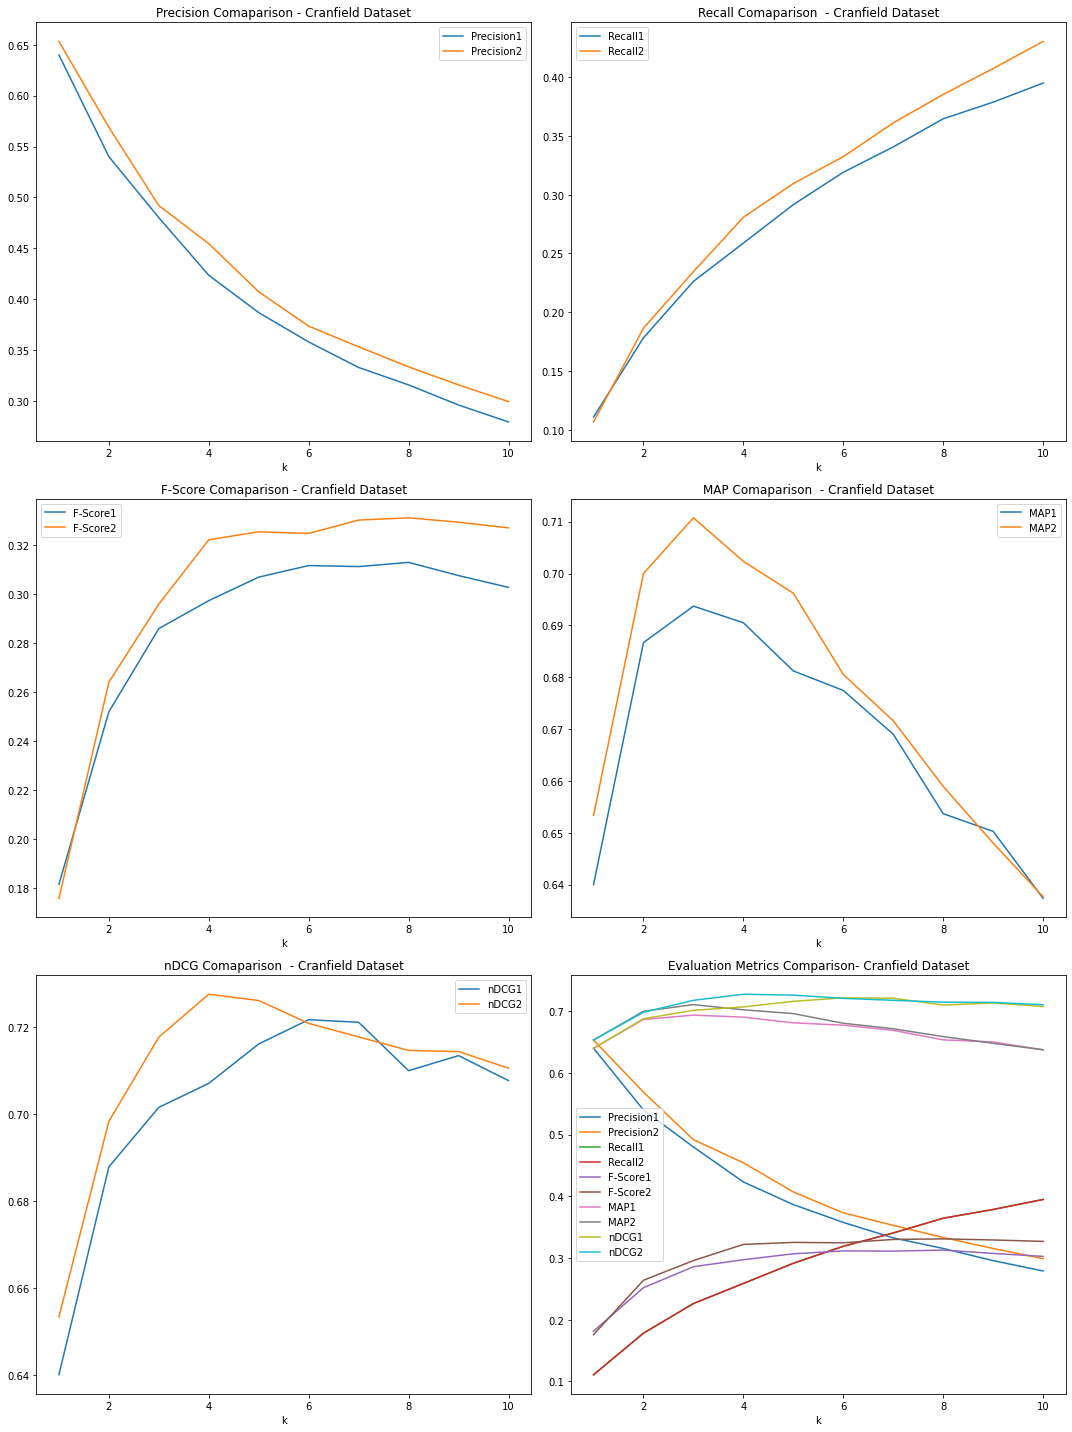

In [61]:
compare_results(Model_VSM,Model_mix)

Yellow color rows correspond to vector space model and White Color rows to Model_mix

In [62]:
from IPython.display import display, HTML
import pandas as pd
df = pd.DataFrame([Model_VSM[0],Model_mix[0], Model_VSM[1],Model_mix[1], Model_VSM[2],Model_mix[2],Model_VSM[3], Model_mix[3],Model_VSM[4],Model_mix[4]], columns=['@1','@2','@3','@4','@5','@6','@7','@8','@9','@10'])
df.index=['Precision1','Precision2', 'Recall1','Recall2','F-Score1','F-Score2','MAP1','MAP2','nDCG1','nDCG2']
df.style.apply(lambda x: ['background: yellow' if x.name in ['Precision1','Recall1','F-Score1','MAP1','nDCG1'] 
                              else '' for i in x], 
                   axis=1)


,@1,@2,@3,@4,@5,@6,@7,@8,@9,@10
Precision1,0.640000,0.540000,0.480000,0.423333,0.386667,0.357778,0.332698,0.315556,0.295802,0.279111
Precision2,0.653333,0.568889,0.491852,0.454444,0.407111,0.373333,0.353016,0.333333,0.315556,0.299111
Recall1,0.110867,0.178303,0.226265,0.258846,0.291581,0.319084,0.340668,0.364581,0.378745,0.394980
Recall2,0.106676,0.186539,0.234517,0.280820,0.309510,0.332366,0.361103,0.385308,0.407383,0.430404
F-Score1,0.181596,0.252003,0.285943,0.297330,0.306921,0.311639,0.311208,0.312930,0.307548,0.302731
F-Score2,0.175892,0.264065,0.295940,0.322149,0.325394,0.324736,0.330188,0.331100,0.329323,0.327007
MAP1,0.640000,0.686667,0.693704,0.690494,0.681204,0.677436,0.668996,0.653665,0.650262,0.637331
MAP2,0.653333,0.700000,0.710741,0.702346,0.696198,0.680530,0.671594,0.658928,0.647991,0.637650
nDCG1,0.640000,0.687859,0.701543,0.707067,0.716142,0.721726,0.721123,0.709983,0.713454,0.707709
nDCG2,0.653333,0.698326,0.717725,0.727584,0.726132,0.720869,0.717755,0.714657,0.714378,0.710575
